# Hyperparameter Tuning


In [1]:
import pandas as pd
from data import load_data_selected_features
from pipelines_selected_features import pipeline

train_data, additional_train_data, test_data = load_data_selected_features()
all_train_data = pipeline.fit_transform(pd.concat([train_data, additional_train_data]))

# cut the data into train, additional train and test
train_data = all_train_data.loc[train_data.index]
additional_train_data = all_train_data.loc[additional_train_data.index]

X_train = train_data.drop(columns=['bg+1:00'])
y_train = train_data['bg+1:00']

X_additional_train = additional_train_data.drop(columns=['bg+1:00'])
y_additional_train = additional_train_data['bg+1:00']

### Tune XGBoost

01:15:37 - Start tuning XGBRegressor
01:15:37 - Parameters: {'n_estimators': Integer(low=1500, high=5000, prior='uniform', transform='identity'), 'learning_rate': Real(low=0.01, high=0.05, prior='log-uniform', transform='identity'), 'max_depth': Integer(low=3, high=10, prior='uniform', transform='identity'), 'min_child_weight': Integer(low=2, high=7, prior='uniform', transform='identity'), 'subsample': Real(low=0.5, high=0.8, prior='uniform', transform='identity'), 'colsample_bytree': Real(low=0.6, high=0.9, prior='uniform', transform='identity'), 'gamma': Real(low=0.1, high=2, prior='log-uniform', transform='identity'), 'alpha': Real(low=1, high=50, prior='log-uniform', transform='identity'), 'lambda': Real(low=1, high=20, prior='log-uniform', transform='identity')}
01:15:37 - Fitting the model
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds 

/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
10:45:00 - Best hyperparameters found.
10:45:00 - OrderedDict({'alpha': 1.6728374329132103, 'colsample_bytree': 0.9, 'gamma': 0.1, 'lambda': 20.0, 'learning_rate': 0.049999999999999996, 'max_depth': 10, 'min_child_weight': 7, 'n_esti

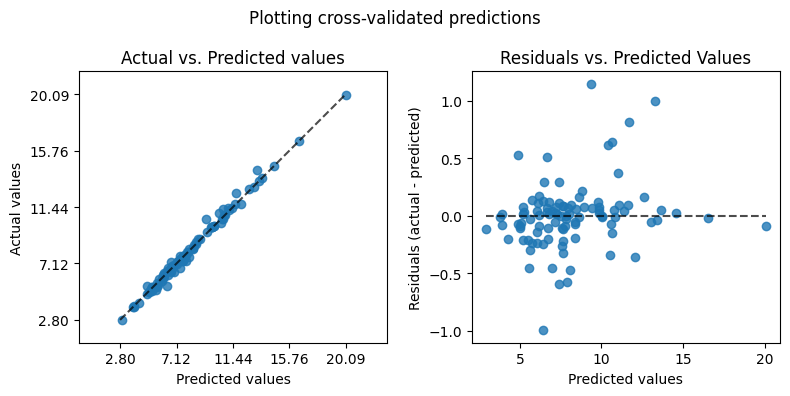

In [2]:
from xgboost import XGBRegressor
from skopt.space import Integer, Real
from model_hyperparameter_tuning import tune_hyperparameters

search_space = {
    'n_estimators': Integer(1500, 5000),  # Allow for more boosting rounds
    'learning_rate': Real(0.01, 0.05, 'log-uniform'),  # Slightly higher learning rates
    'max_depth': Integer(3, 10),  # Allow deeper trees
    'min_child_weight': Integer(2, 7),  # Explore smaller values
    'subsample': Real(0.5, 0.8),  # Light subsampling for diversity while preserving data
    'colsample_bytree': Real(0.6, 0.9),  # Common column sampling range
    'gamma': Real(0.1, 2, 'log-uniform'),  # Small gamma range for light regularization
    'reg_alpha': Real(1, 50, 'log-uniform'),  # Increase upper bound for L1 regularization
    'reg_lambda': Real(1, 20, 'log-uniform'),  # Default L2 regularization
}
model = XGBRegressor(random_state=42, n_jobs=-1)
best_estimator, best_params = tune_hyperparameters(model, search_space, pd.DataFrame(), pd.Series(), X_additional_train, y_additional_train)

In [3]:
import os
import joblib

best_estimator_file_name = f'{model.__class__.__name__}.best_estimator.pkl'
joblib.dump(best_estimator, os.path.join('models', best_estimator_file_name))

['models/XGBRegressor.best_estimator.pkl']